## Beer Recipe Analysis Part3

### Introduction

The analysis is about how different factors associated with the last stage of the homebrewing process. The project is based on the linear regression model and a thorough process is carried out to test the linear assumptions and evaluate the hypothesis made for this project.

For the previous Part1 notebook the content mainly focuses on the background knowledge of beer homebrewing, the assumption made for this project, and how to preprocess the data. For the Part2 notebook, the full regression model is built and the linear regression model assumptions are evaluated.

For this notebook, we will continue working on the model building. The goal is to walk through the procedure we can take to obtain the final model that yields the improvement in performance, to select the optimal model, and to interpret the model.

### Methodology
The Part1 Notebook
1. Data exploratory and cleaning
2. Handle the imbalanced data: Sampling
3. Split the data into training and testing set and standardized the predictors

The Part2 Notebook
2. Test assumptions and build a full model with all the x variables on the training set 
3. Evaluate the baseline model performance on the testing set

The Part3 Notebok
1. Remove outliers and influential observations on the training set
2. Remove the high VIF variables on the training set and obtain the final model
3. Compare two sets of model performance on the testing set 
4. The Model Interpretation and the Conclusion

### The Code from Previous Notebook Part1&2

In [453]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

trasformed_xtrain=pd.read_csv("trasformed_xtrain.csv")
trasformed_xtest=pd.read_csv("trasformed_xtest.csv")
y_train=pd.read_csv("y_train.csv")
y_test=pd.read_csv("y_test.csv")

### First Model on the Full Training Set from Part2

In [454]:
linreg = LinearRegression()
linreg.fit(trasformed_xtrain,y_train)
p_train = linreg.predict(trasformed_xtrain)

abs_error_train=np.array(abs(y_train-p_train)).reshape(-1)
SSE_train=np.dot(abs_error_train,abs_error_train)
mae_train = np.round(np.sum(abs_error_test)/(len(p_test)-(15+1)),2)
rmse_train=np.sqrt(SSE_train/(len(p_train)-(15+1)))# root(SS(Residual)/n-(k+1)) => k+1 number of parameters β’s
r2_train=np.round(linreg.score(trasformed_xtrain,y_train),3)
adjr2_train = np.round(1-(1-r2_train)*(len(p_train)-1)/(len(p_train)-15-1),3)

print("First Model on the Full Training set ")
print("\nRoot Mean Squared Error:",rmse_train)

beer_xtrain1 = sma.add_constant(trasformed_xtrain)
lm1_train = sm.OLS(y_train,beer_xtrain1).fit()
lm1_train.summary()

First Model on the Full Training set 

Root Mean Squared Error: 0.0007375495726178687


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     FG   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 3.067e+04
Date:                Sat, 08 Sep 2018   Prob (F-statistic):               0.00
Time:                        15:57:00   Log-Likelihood:                 52148.
No. Observations:                9000   AIC:                        -1.043e+05
Df Residuals:                    8985   BIC:                        -1.042e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0145   7.77e-06   1.31e+05      0.000       1.015       1.015
Size(L)                 -1.297e-05   4.81e-05     -0.270      0.787      -0.000    8.12e-05
OG                          0.0166   3.52e-05    470.788      0.000       0.016       0.017
ABV                        -0.0130   3.34e-05   -388.446      0.000      -0.013      -0.013
IBU                      1.104e-05   8.46e-06      1.305      0.192   -5.55e-06    2.76e-05
Color                    5.204e-05   8.81e-06      5.904      0.000    3.48e-05    6.93e-05
BoilSize                 3.469e-06    4.8e-05      0.072      0.942   -9.07e-05    9.76e-05
BoilTime                  2.31e-05   8.19e-06      2.822      0.005    7.06e-06    3.92e-05
BoilGravity              7.025e-06   1.16e-05      0.608      0.543   -1.56e-05    2.97e-05
Efficiency               1.575e-05    1.2e-05      1.309      0.191   -7.84e-06    3.93e-05
MashThickness            4.171e-06   8.02e-06      0.520      0.603   -1.16e-05    1.99e-05
PrimaryTemp             -2.111e-05   7.81e-06     -2.702      0.007   -3.64e-05    -5.8e-06
BrewMethod_All Grain     -1.33e-05   5.74e-06     -2.317      0.021   -2.45e-05   -2.05e-06
BrewMethod_BIAB         -6.337e-06   6.34e-06     -0.999      0.318   -1.88e-05    6.09e-06
BrewMethod_Partial Mash   2.38e-05   7.42e-06      3.208      0.001    9.26e-06    3.83e-05
BrewMethod_extract       1.149e-05   1.01e-05      1.137      0.256   -8.33e-06    3.13e-05
==============================================================================
Omnibus:                    10771.552   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2199837.271
Skew:                           6.198   Prob(JB):                         0.00
Kurtosis:                      78.581   Cond. No.                     4.29e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Part3 Build New Model to Improve the Performance

 From the previous notebook about assumptions evaluation, we learn that there are two obvious issues that might potentially affect the correctness of the model. The outliers and influential observations detected in the residual analysis and normal probability plot, and the multicollinearity detected from the correlation analysis. Therefore, for the following task we will try to solve these problem to improve the model.

### 1. Remove Outliers and Influental Observations on the training set

In [455]:
#Remove outliers on training set
influence = lm1_train.get_influence()  
resid_student = influence.resid_studentized_external
resid = pd.concat([beer_xtrain1,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index


In [456]:
#101 outliers have been dropped from training set

beer_xtrain2=beer_xtrain1.drop(ind,axis = 0)
beer_xtrain2.reset_index(drop=True,inplace=True)

y2_train=y_train.drop(ind,axis = 0)
y2_train.reset_index(drop=True,inplace=True)

lm1_train_outliers_removed=sm.OLS(y2_train,beer_xtrain2).fit()

len(beer_xtrain1)-len(beer_xtrain2)

101

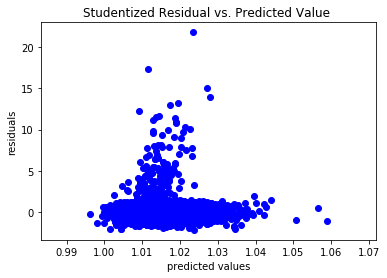

In [457]:
plt.scatter(p_train, resid_student, c='b')
plt.title('Studentized Residual vs. Predicted Value ')
pl.xlabel('predicted values')
pl.ylabel('residuals')
plt.show()

We often use the standardized residuals or studentized residual to identify outliers. Observations with standardized/studentized residuals larger than or equal to 3 or smaller than or equal to –3 can be seen as outliers. 

In the visualization above, we can see that not only does the pattern shows a funnel shape, there are some observations are obviously larger than 3 and smaller than -3 in residual plot. After looking into it we find 76 observations are outliers and remove them from the training set.

*Difference between the two is that the standardized residuals follow an approximately normal distribution, while a studentized residual follows an approximate t-distribution.


#### Rerun the model after removing outliers

In [458]:
p_beer_xtrain2=lm1_train_outliers_removed.predict(beer_xtrain2)
y2_train_a=np.array(y2_train).reshape(-1)
RMSE_beer_train2=np.sqrt(np.dot((y2_train_a-p_beer_xtrain2).T,(y2_train_a-p_beer_xtrain2))/(len(y2_train)-(15+1)))
print("\nRoot Mean Squared Error:", RMSE_beer_train2)
print(lm1_train_outliers_removed.summary())


Root Mean Squared Error: 0.00043969051727479343
                            OLS Regression Results                            
Dep. Variable:                     FG   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 8.508e+04
Date:                Sat, 08 Sep 2018   Prob (F-statistic):               0.00
Time:                        15:58:26   Log-Likelihood:                 56165.
No. Observations:                8899   AIC:                        -1.123e+05
Df Residuals:                    8884   BIC:                        -1.122e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

#### After removing the outlers and influential points, we can learn that the RMSE has decreased from 0.14 to 0.0085, the R square has improve from 0.98 to 0.993, and the F test has also improved 

### 2. Check the VIF Value for Multicolliniarity on the training set

 When VIF (variance inflation factor) is the measure of multicollinearity among the X-variables, when vif >= 10 suggests there is collinearity, If X-variables are highly collinear the VIF value will approach infinity.

 *The VIF may be calculated for each predictor by doing a linear regression of that predictor on all the other predictors, and then obtaining the R2 from that regression. The VIF is just 1/(1-R2).

In [459]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
v=[variance_inflation_factor(beer_xtrain2.values, j) for j in range(beer_xtrain2.shape[1])]
vif_tb=pd.DataFrame(v,columns=["VIF"])
variable=['const','Size(L)', 'OG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime','BoilGravity', 'Efficiency', 'MashThickness', 'PrimaryTemp','BrewMethod_All Grain', 'BrewMethod_BIAB',"BrewMethod_Partial Mash", 'BrewMethod_extract']
vif_tb.insert(0, "variable", variable)

print(vif_tb)

                   variable        VIF
0                     const   0.000000
1                   Size(L)  38.240272
2                        OG  20.574324
3                       ABV  18.576071
4                       IBU   1.185443
5                     Color   1.283799
6                  BoilSize  38.181276
7                  BoilTime   1.106078
8               BoilGravity   2.206208
9                Efficiency   2.403132
10            MashThickness   1.064622
11              PrimaryTemp   1.010633
12     BrewMethod_All Grain        inf
13          BrewMethod_BIAB        inf
14  BrewMethod_Partial Mash        inf
15       BrewMethod_extract        inf


C:\Anacon\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Anacon\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


#### With the VIF table above, we can find multiple x variables have VIF value larger than 10. Among the x variables that has infinity VIF value, I decided to remove x variable "BrewMethod_Partial Mash" because according to the t-test, this variable is not significant to the model at 5% and has the largest p-value among the variables that have infinity VIF value.


In [460]:
#remove caraibel "BrewMethod_Partial Mash"
beer2_remove_highVF=beer_xtrain2[['const','Size(L)', 'OG', 'ABV', 'IBU', 'Color',"BoilSize", 'BoilTime','BoilGravity', 'Efficiency', 'MashThickness', 'PrimaryTemp','BrewMethod_All Grain', 'BrewMethod_BIAB', 'BrewMethod_extract']]
len(beer2_remove_highVF.columns)

15

#### After removing the x variable "BrewMethod_BIAB", I then re-run the model and remove the observations that have the residual larger than 3 or smaller than -3 from the new model.

In [461]:
#remove outliers from training set after high vif x variable "BrewMethod_BIAB" is removed

lm2_train = sm.OLS(y2_train,beer2_remove_highVF).fit()
influence2 = lm2_train.get_influence()  
resid_student2 = influence2.resid_studentized_external

In [462]:
resid2 = pd.concat([beer2_remove_highVF,pd.Series(resid_student2,name = "Studentized Residuals")],axis = 1)
ind2 = resid2.loc[np.absolute(resid2["Studentized Residuals"]) > 3,:].index
beer_xtrain3=beer2_remove_highVF.drop(ind2,axis = 0)
beer_xtrain3.reset_index(drop=True,inplace=True)

y3_train=y2_train.drop(ind2,axis = 0)
y3_train.reset_index(drop=True,inplace=True)

In [463]:
#calculate the number of influential observations that have been removed for the 2nd round 
len(y2_train)-len(y3_train)

46

In [464]:
#refit the model after removing the outliers and influencial observations
lm2_train_outliers_removed = sm.OLS(y3_train,beer_xtrain3).fit()

In [465]:
#calculate the vif value for the x variables
v2=[variance_inflation_factor(beer_xtrain3.values, j) for j in range(beer_xtrain3.shape[1])]
vif_tb2=pd.DataFrame(v2,columns=["VIF"])
variable=['const','Size(L)', 'OG', 'ABV', 'IBU', 'Color',"BoilSize", 'BoilTime','BoilGravity', 'Efficiency', 'MashThickness', 'PrimaryTemp','BrewMethod_All Grain', 'BrewMethod_BIAB', 'BrewMethod_extract']
vif_tb2.insert(0, "variable", variable)


#### Final model results

In [466]:
p_beer_xtrain3=lm2_train_outliers_removed.predict(beer_xtrain3)
y3_train_a=np.array(y3_train).reshape(-1)
RMSE_beer_train3=np.sqrt(np.dot((y3_train_a-p_beer_xtrain3).T,(y3_train_a-p_beer_xtrain3))/(len(y3_train)-(14+1)))

print(vif_tb2)
print("\n\n\nRoot Mean Squared Error:", RMSE_beer_train3)
print(lm2_train_outliers_removed.summary())

                variable        VIF
0                  const   1.000794
1                Size(L)  38.238772
2                     OG  20.762309
3                    ABV  18.754773
4                    IBU   1.185773
5                  Color   1.284913
6               BoilSize  38.179627
7               BoilTime   1.106700
8            BoilGravity   2.207671
9             Efficiency   2.407893
10         MashThickness   1.064800
11           PrimaryTemp   1.010547
12  BrewMethod_All Grain   5.855058
13       BrewMethod_BIAB   4.448837
14    BrewMethod_extract   3.345662



Root Mean Squared Error: 0.00041888667628367255
                            OLS Regression Results                            
Dep. Variable:                     FG   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 9.360e+04
Date:                Sat, 08 Sep 2018   Prob (F-statistic

#### We can learn that after removing the x variable "BrewMethod_BIAB  ", the VIF values for the x variables have changed, for the new model variable "OG" "Size.L."," BoilSize"and "ABV" are still high in VIF value. However, I decided to leave them in the model mainly because the model performance in generall shows the good result. RMSE=0.00041, R square becomes 0.993 from 0.98 and F statistic increase too.


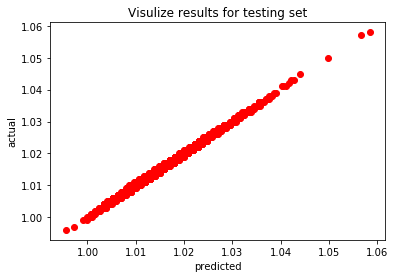

In [467]:
# Visulize results on training set
%matplotlib inline
plt.plot(p_beer_xtrain3, y3_train_a,'ro')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title("Visulize results for testing set")
plt.show()

#### Ealuate the linear model assumptions on the final model

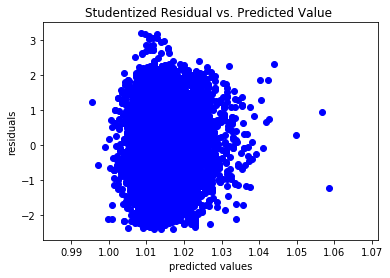

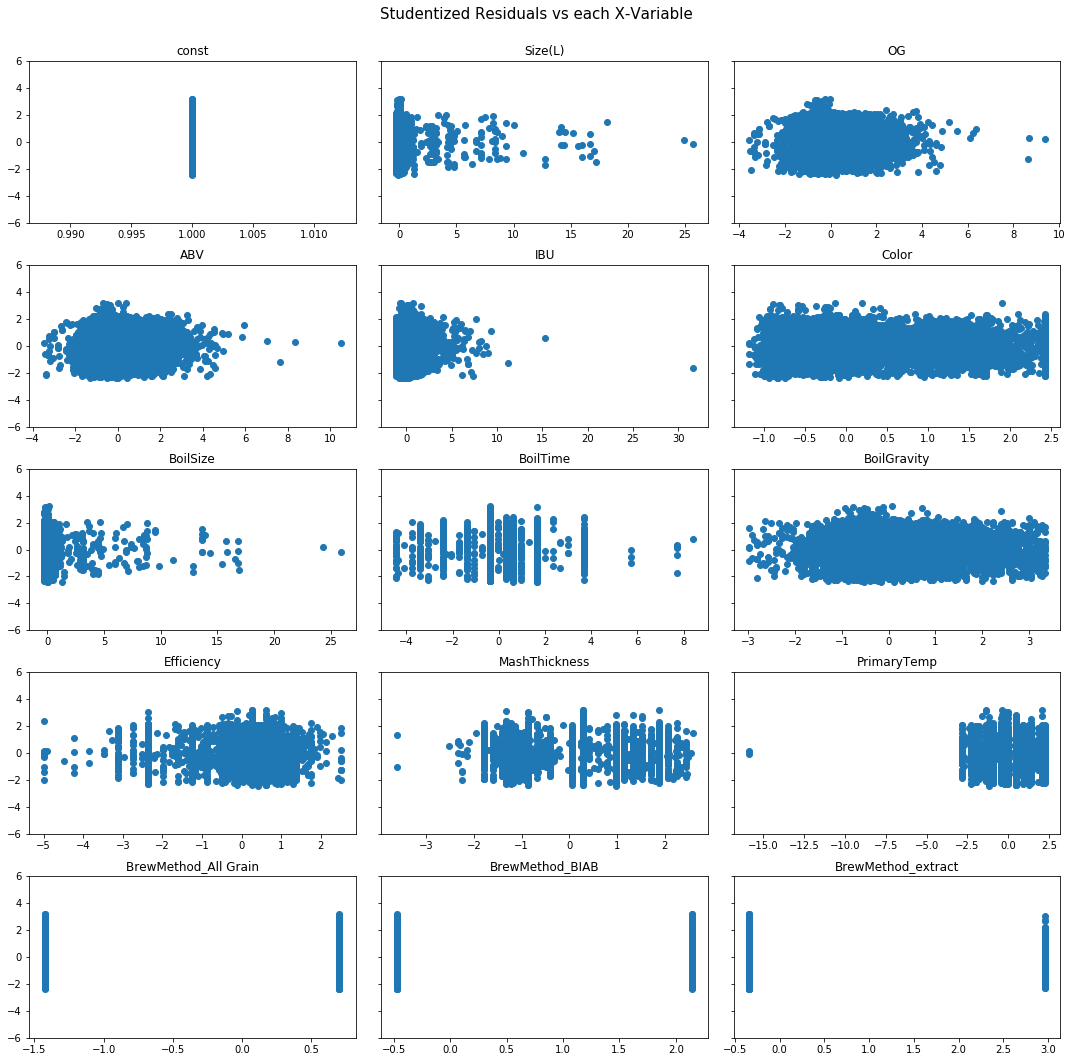

In [468]:
influence3 = lm2_train_outliers_removed.get_influence()  
resid_student3 = influence3.resid_studentized_external

lm2_train_p=lm2_train_outliers_removed.predict(beer_xtrain3)
plt.scatter(lm2_train_p, resid_student3, c='b')
plt.title('Studentized Residual vs. Predicted Value ')
pl.xlabel('predicted values')
pl.ylabel('residuals')
plt.show()


#plot scatter plot for y variable vs. x variables
f, axarr = plt.subplots(5, 3,figsize=(15,15),sharey=True)
for i in range(len(beer_xtrain3.columns.values)):
    if i <3:
        axarr[0, i].scatter(beer_xtrain3[["{}".format(beer_xtrain3.columns.values[i])]],resid_student3)
        axarr[0, i].set_title("{}".format(beer_xtrain3.columns.values[i]))
        axarr[0, i].set_ylim([-6, 6])
    elif 3<=i<6:
        i1=i-3
        axarr[1, i1].scatter(beer_xtrain3[["{}".format(beer_xtrain3.columns.values[i])]],resid_student3)
        axarr[1, i1].set_title("{}".format(beer_xtrain3.columns.values[i]))
    elif 6<=i<9:
        i2=i-6
        axarr[2, i2].scatter(beer_xtrain3[["{}".format(beer_xtrain3.columns.values[i])]],resid_student3)
        axarr[2, i2].set_title("{}".format(beer_xtrain3.columns.values[i]))
    elif 9<=i<12:
        i3=i-9
        axarr[3, i3].scatter(beer_xtrain3[["{}".format(beer_xtrain3.columns.values[i])]],resid_student3)
        axarr[3, i3].set_title("{}".format(beer_xtrain3.columns.values[i]))
    elif 12<=i<15:
        i4=i-12
        axarr[4, i4].scatter(beer_xtrain3[["{}".format(beer_xtrain3.columns.values[i])]],resid_student3)
        axarr[4, i4].set_title("{}".format(beer_xtrain3.columns.values[i]))

f.suptitle("Studentized Residuals vs each X-Variable",fontsize=15)        
plt.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

#### For the plot above, in general, all the residual plots display a huge improvement from the part2 notebook and show constant variance and independence since the observations are randomly scattered around the horizontal line.

#### Evaluate the normality assumption

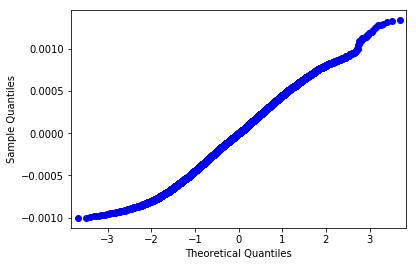

In [469]:
import statsmodels.api as sm
res = lm2_train_outliers_removed.resid # residuals
fig = sm.qqplot(res)
plt.show()

 From the plot, we can be sure that the model satisfy with the normality assumption, because there is 45 degree straight line on the normal probability plot.


#### The Final Model:
 1.0145 - 1.31e-05*Size.L + 0.017*OG - 0.013*ABV + 2.65e-06*IBU + 9.35e-06*color + 8.41e-06*BoilSize + 6.47e-06*BoilTime + 1.62e-05*BoilGravity + 1.34e-05*Efficiency + 2.2e-06*MashThickness + 4.58e-07*PrimaryTemp +2.88e-06*BrewMethod_All Grain + 2.27e-06*BrewMethod_BIAB + 1.13e-05*BrewMethod_extract

#### The Performance of Final Model on the testing set

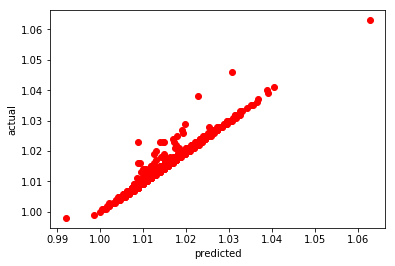



Final Model Performance on testing set

Root Mean Squared Error: 0.0009562528640883075 
Coefficient of Determination: 0.968 
adjusted r2: 0.968 
F statistic:  4783.241918179988 
p-value for the F statistic:  1.1102230246251565e-16


In [470]:
#By default, the LinearRegression class of scikit-learn automatically finds the intercept term so we can remove the column of 1s in the matrix
linreg_final = LinearRegression()
xtrain3=beer_xtrain3.drop(["const"],axis=1)
linreg_final.fit(xtrain3,y3_train)


#drop the column that have been removed from the training set
x_test1=trasformed_xtest.drop(["BrewMethod_Partial Mash"],axis=1)
final_p = linreg_final.predict(x_test1)


error_test=y_test-final_p 
abs_error_test=np.array(abs(y_test-final_p )).reshape(-1)


#results on testing set 
mae_test = np.round(np.sum(abs_error_test)/(len(final_p )-(14+1)),2)

SSE_test=np.dot(abs_error_test,abs_error_test)
rmse_test=np.sqrt(SSE_test/(len(final_p)-(14+1))) # root(SS(Residual)/n-(k+1)) => k+1 number of parameters β’s
standardized_residual_test=error_test/rmse_test
r2_test=np.round(linreg_final.score(x_test1,y_test),3)
adjr2_test = np.round(1-((1-r2_test)*(len(final_p)-1)/(len(final_p )-14-1)),3)

y_mean_test=np.repeat(np.array([np.mean(y_test)]),2250,axis=0)
SSR_test=np.dot((y_mean_test-final_p).T,(y_mean_test-final_p))
MSR_test=SSR_test/14
MSE_test=SSE_test/(len(final_p)-(14+1))
F_statistic_test=MSR_test/MSE_test
standardized_residual_test=error_test/rmse_test

#calculate the p value for the f statistic
from scipy import stats
dfreg=len(xtrain3.columns.values)
dfres=len(x_test1)-(dfreg+1)
p = 1.0 - stats.f.cdf(F_statistic_test,dfreg,dfres)
float(p)

pl.plot(final_p, y_test,'ro')
pl.xlabel('predicted')
pl.ylabel('actual')
pl.show()

#Final model performance on testing set 
print("\n\nFinal Model Performance on testing set")
print("\nRoot Mean Squared Error:",rmse_test,"\nCoefficient of Determination:",r2_test,"\nadjusted r2:",adjr2_test,"\nF statistic: ",float(F_statistic_test),"\np-value for the F statistic: ",float(p))


### 3. The Model Interpretation and  the Conclusion

In [471]:
#First model performance
p_test = linreg.predict(trasformed_xtest)
error_test=y_test-p_test
abs_error_test=np.array(abs(y_test-p_test)).reshape(-1)
#results on testing set 
mae_test = np.round(np.sum(abs_error_test)/(len(p_test)-(15+1)),2)
SSE_test=np.dot(abs_error_test,abs_error_test)
rmse_test1=np.sqrt(SSE_test/(len(p_test)-(15+1))) # root(SS(Residual)/n-(k+1)) => k+1 number of parameters β’s
standardized_residual_test=error_test/rmse_test
r2_test1=np.round(linreg.score(trasformed_xtest,y_test),3)
adjr2_test1 = np.round(1-(1-r2_test)*(len(p_test)-1)/(len(p_test)-15-1),3)

y_mean_test=np.repeat(np.array([np.mean(y_test)]),2250,axis=0)
SSR_test=np.dot((y_mean_test-p_test).T,(y_mean_test-p_test))
MSR_test=SSR_test/15
MSE_test=SSE_test/(len(p_test)-(15+1))
F_statistic_test1=MSR_test/MSE_test
#calculate the p value for the f statistic
from scipy import stats
dfreg1=len(trasformed_xtrain.columns.values)
dfres1=len(trasformed_xtest)-(dfreg+1)
p1 = 1.0 - stats.f.cdf(F_statistic_test1,dfreg1,dfres1)


print("\n\nFirst Model Performance on testing set")
print("\nRoot Mean Squared Error:",rmse_test1,"\nCoefficient of Determination:",r2_test1,"\nadjusted r2:",adjr2_test1,"\nFstatistic:",float(F_statistic_test1),"\np-value for the F statistic: ",float(p1))

#Final model performance on testing set 
print("\n\nFinal Model Performance on testing set")
print("\nRoot Mean Squared Error:",rmse_test,"\nCoefficient of Determination:",r2_test,"\nadjusted r2:",adjr2_test,"\nF statistic: ",float(F_statistic_test),"\np-value for the F statistic: ",float(p),"\n\n")





First Model Performance on testing set

Root Mean Squared Error: 0.0009171888081576032 
Coefficient of Determination: 0.971 
adjusted r2: 0.968 
Fstatistic: 4854.561932753852 
p-value for the F statistic:  1.1102230246251565e-16


Final Model Performance on testing set

Root Mean Squared Error: 0.0009562528640883075 
Coefficient of Determination: 0.968 
adjusted r2: 0.968 
F statistic:  4783.241918179988 
p-value for the F statistic:  1.1102230246251565e-16 




For this project, the analysis is about how different factors associated with the last stage of the homebrewing process. According to the research, since fermentation is often the last stage of the beer making process, I make the hypothesis that the changes of the specific gravity of wort after fermentation are highly depended on other factors in the brewing process. To learn the relationship between the dependent variable FG (specific gravity of wort after fermentation) and other independent variables, the linear regression model is applied in this project and a thorough process is carried out to test the assumptions and evaluate the hypothesis made for this project.

Two models are built on the training set and are evaluated on the testing set. The first model is built based on the full training set, that is the model contains all the x variables. After testing the linear model assumptions, some data violated the assumptions are removed and the second model is built on the remaining data from the training set. From the results above, We can learn that the performance of both models does not very much. Both models are able to capture 97% of the variance when explaining the dependent variable y. Also, the f test, the general indicator of the model, from two models are significant in 5% suggests that both models are good fits for the data and the hypothesis we made is valid since there is a linear relationship between the dependent variable and independent variables.

To interpret the model, the coefficient value represents the mean change in the response variable (FG) given a one-unit increase in the predictor while the other predictors stay constant. However, in our case, because the units vary between the different types of variables makes it impossible to compare them directly (please refer to notebook part1 for the attribute information) Therefore, we first standardize the predictors in notebook part1 before fitting the regression model. The standardization puts the different predictors on the same scale and allows us to compare the relative importance of each coefficient in a regression model.

For the final model, 

FG = 1.0145 - 1.31e-05*Size.L + 0.017*OG - 0.013*ABV + 2.65e-06*IBU + 9.35e-06*color + 8.41e-06*BoilSize + 6.47e-06*BoilTime + 1.62e-05*BoilGravity + 1.34e-05*Efficiency + 2.2e-06*MashThickness + 4.58e-07*PrimaryTemp +2.88e-06*BrewMethod_All Grain + 2.27e-06*BrewMethod_BIAB + 1.13e-05*BrewMethod_extract

we can learn that OG has the standardized coefficient with the largest absolute value, followed by ABV. Therefore, the specific gravity of wort before fermentation (OG) and the alcohol by volume (ABV) are the 2 most important variable in the model that affect the specific gravity of wort after fermentation. 

To interpret the model, we can say that while the other predictors stay constant, with every increase of one standard deviation in specific gravity of wort before fermentation (OG), the specific gravity of wort rises 0.017 after fermentation. And the specific gravity of wort decreases 0.013 after fermentation for every increase of one standard deviation in the alcohol by volume (ABV).

For the future work, I plan to use the same data to build Ridge and Lasso regression and compare the results from which I obtained from the standard linear regression model. As you might observe above, even though the performance from the final model increased when evaluating on the training set, it doesn't perform better on the testing set compared to the performance obtained from the first model, therefore, it is possible that the final model learns the training set too well. To avoid overfitting, in the future we can apply the Ridge and Lasso models to regularize the standard linear regression model and make a comparison of the results.